## Exc session 5

In [47]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

%matplotlib inline 

iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

In [7]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


NameError: name 'plot' is not defined

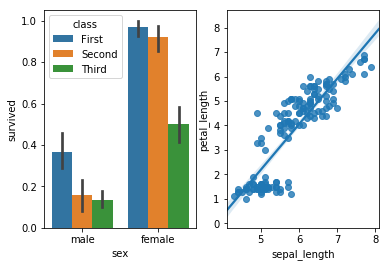

In [5]:
twoplots, axes = plt.subplots(1, 2)
sns.barplot(x='sex', y='survived', data=titanic, hue='class', ax=axes[0])
sns.regplot(x='sepal_length', y='petal_length', data=iris, ax=axes[1])
plot.set(title='kutplot', xlabel ='sepal length', ylabel='petal length')
f.savefig("output.png")

In [ ]:
sns.pairplot(data=iris, hue="species", palette='husl')


##  5.2

C:\Users\Joost\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Joost\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


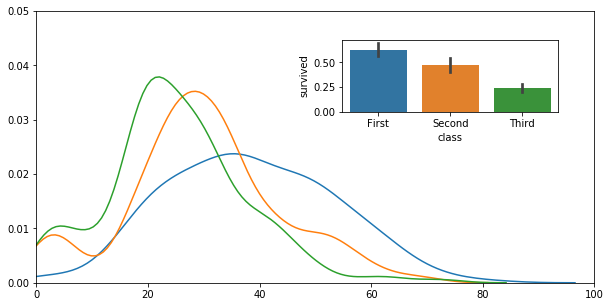

In [121]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlim([0, 100])
ax.set_ylim([0, 0.05])
classes= ['First', 'Second', 'Third']
for i in classes:
    data = titanic[titanic['class'] == i]
    age = data['age']
    name = str(i)
    # sns.kdeplot(age, label=name)
    sns.kdeplot(age, legend=False)
plt.axes([0.55, 0.6, 0.3, 0.2])
sns.barplot(x='class', y='survived', data=titanic)


## Exc session 6

In [198]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

df_weather = pd.read_csv(url,
                         compression='gzip', 
                         header=None).iloc[:,:4]
df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
df_weather['obs_value'] = df_weather['obs_value'] / 10
df_weather.head(3)

,station,datetime,obs_type,obs_value
0,ITE00100550,18640101,TMAX,1.0
1,ITE00100550,18640101,TMIN,-2.3
2,ITE00100550,18640101,PRCP,2.5


In [206]:
df_weather.datetime = pd.to_datetime(df_weather.datetime.astype(str))
df_weather.head()

,station,datetime,obs_type,obs_value,Month
0,ITE00100550,1864-01-01,TMAX,1.0,1
1,ITE00100550,1864-01-01,TMIN,-2.3,1
2,ITE00100550,1864-01-01,PRCP,2.5,1
3,ASN00079028,1864-01-01,PRCP,0.0,1
4,USC00064757,1864-01-01,PRCP,11.9,1


In [208]:
month = df_weather.datetime.dt.month
df_weather = df_weather.assign(Month=month)
df_weather.tail()

,station,datetime,obs_type,obs_value,Month
27343,UK000056225,1864-12-31,PRCP,0.3,12
27344,ASN00026026,1864-12-31,PRCP,0.0,12
27345,ASN00089049,1864-12-31,PRCP,0.0,12
27346,SZ000006717,1864-12-31,TMAX,-6.2,12
27347,SZ000006717,1864-12-31,TMIN,-10.5,12


In [210]:
df_weather = df_weather.set_index(pd.DatetimeIndex(df_weather.datetime))
df_weather.head()

,station,datetime,obs_type,obs_value,Month
datetime,,,,,
1864-01-01,ITE00100550,1864-01-01,TMAX,1.0,1
1864-01-01,ITE00100550,1864-01-01,TMIN,-2.3,1
1864-01-01,ITE00100550,1864-01-01,PRCP,2.5,1
1864-01-01,ASN00079028,1864-01-01,PRCP,0.0,1
1864-01-01,USC00064757,1864-01-01,PRCP,11.9,1


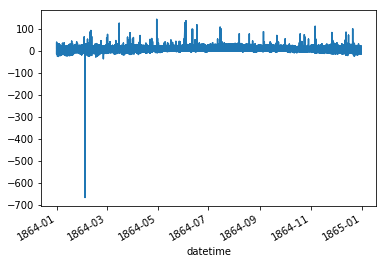

In [212]:
df_weather.obs_value.plot()

In [243]:
country_id = df_weather.station.str[:3]
country_id.head()
df_weather = df_weather.assign(Country_id=country_id)
df_weather.head()

,station,datetime,obs_type,obs_value,Month,Country_id
datetime,,,,,,
1864-01-01,ITE00100550,1864-01-01,TMAX,1.0,1,ITE
1864-01-01,ITE00100550,1864-01-01,TMIN,-2.3,1,ITE
1864-01-01,ITE00100550,1864-01-01,PRCP,2.5,1,ITE
1864-01-01,ASN00079028,1864-01-01,PRCP,0.0,1,ASN
1864-01-01,USC00064757,1864-01-01,PRCP,11.9,1,USC


In [1]:
def weerbericht(url):
    df_w = pd.read_csv(url,
                         compression='gzip', 
                         header=None).iloc[:,:4]
    df_w.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    df_w['obs_value'] = df_w['obs_value'] / 10
    df_w.datetime = pd.to_datetime(df_w.datetime.astype(str))
    month = df_w.datetime.dt.month
    df_w = df_w.assign(Month=month)
    df_w = df_w.set_index(pd.DatetimeIndex(df_w.datetime))
    country_id = df_w.station.str[:3]
    df_w = df_w.assign(Country_id=country_id)
    df_w.head()
    
weerbericht('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz')

NameError: name 'pd' is not defined

## 6.2

In [277]:
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
newdata = pd.read_csv(url2, header=None, skipinitialspace = True, na_values=["?"])
newdata.columns = ['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']
# newdata = newdata.iloc[25:35,]
newdata = newdata.dropna()
newdata.head()

,age,workclass,fnlwgt,educ,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [284]:
pd.crosstab(newdata.sex, newdata.wage, normalize='index')

wage,<=50K,>50K
sex,,
Female,0.886322,0.113678
Male,0.686163,0.313837
